In [35]:
import gzip
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(linewidth=500000)

def load_mnist(mnist_path):
    return _load_image(mnist_path + 'train-images-idx3-ubyte.gz'),\
           _load_label(mnist_path + 'train-labels-idx1-ubyte.gz'),\
           _load_image(mnist_path + 't10k-images-idx3-ubyte.gz'),\
           _load_label(mnist_path + 't10k-labels-idx1-ubyte.gz')

def _load_image(image_path):
    with gzip.open(image_path, 'rb') as f:
        buffer = f.read()
    size = np.frombuffer(buffer, np.dtype('>i4'), 1, offset=4)
    rows = np.frombuffer(buffer, np.dtype('>i4'), 1, offset=8)
    columns = np.frombuffer(buffer, np.dtype('>i4'), 1, offset=12)
    data = np.frombuffer(buffer, np.uint8, offset=16)
    image = np.reshape(data, (size[0], rows[0] * columns[0]))
    image = image.astype(np.float32)
    return image

def _load_label(label_path):
    with gzip.open(label_path, 'rb') as f:
        buffer = f.read()
    size = np.frombuffer(buffer, np.dtype('>i4'), 1, offset=4)
    data = np.frombuffer(buffer, np.uint8, offset=8)
    label = np.zeros((size[0], 10))
    for i in range(size[0]):
        label[i, data[i]] = 1
    return label

def min_max(x, axis=None):
    x_min = np.min(x, axis=axis, keepdims=True)
    x_max = np.max(x, axis=axis, keepdims=True)
    return (x - x_min) / np.maximum((x_max - x_min),1e-7)

def z_score(x, axis=None):
    x_mean = np.mean(x, axis=axis, keepdims=True)
    x_std = np.std(x, axis=axis, keepdims=True)
    return (x - x_mean) / x_std

def affine(z, W, b):
    return np.dot(z, W) + b

# sigmodi function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# hyperbolic tangent function tanh(x)
def tanh(x):
    return np.tanh(x)

# ReLU (rectified linear unit)
def relu(x):
    return np.maximum(0, x)

# identity function
def identity(x):
    return x

# softmax function
def softmax(x):
    x = x.T
    max_x = np.max(x, axis=0)
    exp_x = np.exp(x - max_x)
    sum_exp_x = np.sum(exp_x, axis=0)
    y = exp_x/sum_exp_x
    return y.T

# LeCun initializer
def lecun_normal(d_1, d):
    std = 1 / np.sqrt(d_1)
    return np.random.normal(0, std, (d_1, d))
def lecun_uniform(d_1, d):
    min = -np.sqrt(3/d_1)
    max = np.sqrt(3/d_1)
    return np.random.uniform(min, max, (d_1, d))

# Glorot initializer
def glorot_normal(d_1, d):
    std = np.sqrt(2 / (d_1 + d))
    return np.random.normal(0, std, (d_1, d))
def glorot_uniform(d_1, d):
    min = -np.sqrt(6 / (d_1 + d))
    max = np.sqrt(6 / (d_1 + d))
    return np.random.uniform(min, max, (d_1, d))

# He initializer
def he_normal(d_1, d):
    std = np.sqrt(2 / d_1)
    return np.random.normal(0, std, (d_1, d))
def he_uniform(d_1, d):
    min = -np.sqrt(6 / d_1)
    max = np.sqrt(6 / d_1)
    return np.random.uniform(min, max, (d_1, d))

# Loss function
# Error sum of squares
def mean_squared_error(y, t):
    size = 1
    if y.ndim == 2:
        size = y.shape[0]
    return 0.5 * np.sum(( y - t )**2) / size

# Cross entropy error
def cross_entropy_error(y, t):
    size = 1
    if y.ndim == 2:
        size = y.shape[0]
    return -np.sum(t * np.log(y)) / size

# gradient
def calc_gradient(x, t, w):
    h = 1e-4
    gradient = np.zeros(w.shape)
    for idx, i in np.ndenumerate(w):
        work = w[idx]
        
        w[idx] = work + h
        yph = propagation(x)
        eph = error_func(yph, t)
        
        w[idx] = work - h
        ymh = propagation(x)
        emh = error_func(ymh, t)
        
        gradient[idx] = (eph - emh) / (2*h)
        
        w[idx] = work
    
    return gradient

def accuracy_rate(y, t):
    max_y = np.argmax(y, axis=1)
    max_t = np.argmax(t, axis=1)
    return np.sum(max_y == max_t)/y.shape[0]

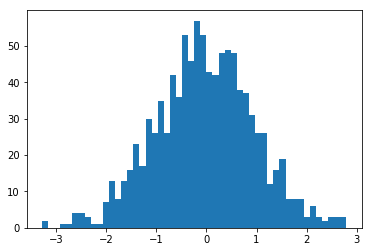

In [43]:
x = np.random.normal(0, 1, 1000)
plt.hist(x, bins=50)
plt.show()

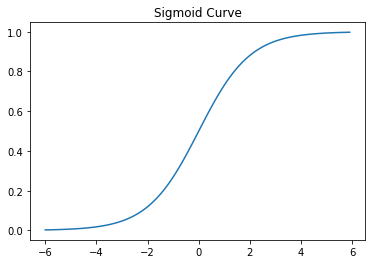

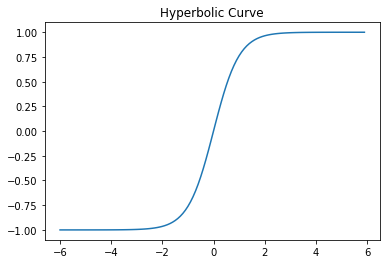

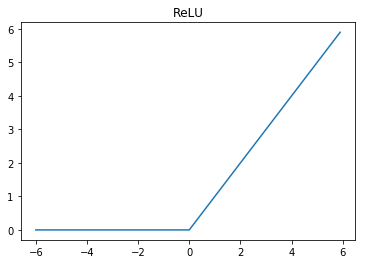

In [36]:
x = np.arange(-6.0, 6.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.title('Sigmoid Curve')
plt.show()

y = tanh(x)
plt.title('Hyperbolic Curve')
plt.plot(x, y)
plt.show()

y = relu(x)
plt.title('ReLU')
plt.plot(x, y)
plt.show()

In [18]:
if __name__ == '__main__':
    # number of node
    d0 = 784
    d1 = 50
    d2 = 100
    d3 = 10
    
    # initialization of weight and bias
    W1 = he_normal(d0, d1)
    b1 = np.zeros(d1)
    W2 = he_normal(d1, d2)
    b2 = np.zeros(d2)
    W3 = he_normal(d2, d3)
    b3 = np.zeros(d3)
    
    # reading MNIST data
    mnist_path = 'C:\\Users\\yuta.sonoda\\Desktop\\python\\jupyter_notebook\\mnist\\'
    x_train, t_train, x_test, t_test = load_mnist(mnist_path)
    
    # normalization of input data
    z0 = min_max(x_train)
    
    # hidden layer 1
    u1 = affine(z0[0], W1, b1)
    z1 = relu(u1)
    
    # hidden layer 2
    u2 = affine(z1, W2, b2)
    z2 = relu(u2)
    
    # output layer
    u3 = affine(z2, W3, b3)
    y = softmax(u3)
    
    print(y)
    print(t_train[0])
    print(mean_squared_error(y, t_train[0]))
    print(cross_entropy_error(y, t_train[0]))

[0.06438897 0.18878004 0.07502254 0.07095018 0.08207274 0.10267452 0.1074137  0.16537109 0.07578008 0.06754616]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
0.4557827540695143
2.2761913089662706


In [42]:
y=np.array([[1,0,0,0],[1,0,0,0],[0,1,0,0]])
max_y = np.argmax(y,axis=1)
t=np.array([[0.5,0.2,0.1,0.1],[0.1,0,0,0],[0.9,0,0,0]])
max_t = np.argmax(t, axis=1)
print(max_y)
print(max_t)
print(np.sum(max_y == max_t))

[0 0 1]
[0 0 0]
2
